## Project - Seattle Airbnb Dataset  

BY Fabi Daniel

In [ ]:
# import all necessary modules

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#load dataset

calendar_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/calendar.csv')
listings_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/listings.csv')
reviews_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/reviews.csv')

In [ ]:
calendar_df.head()

In [ ]:
calendar_df.info()

* There are Four Columns In calendar_df, 1393570 observations

In [ ]:
listings_df.head()

In [ ]:
listings_df.info()

* There are 91 columns in listings_df, 3818 observations

In [ ]:
reviews_df.head()

In [ ]:
reviews_df.info()

* There are 6 columns in reviews_df, 84849 observations

### Data Assessment


In [ ]:
listings_df.sample(10)

##### Overview of listings_df

It has 91 columns

In [ ]:
# Get an Overview of columns that are float
listings_df.loc[:,(listings_df.dtypes=='float64').values]

In [ ]:
# Get an Overview of columns that are Object
listings_df.loc[:,(listings_df.dtypes=='object').values]

In [ ]:
listings_df.loc[:,(listings_df.dtypes=='int').values]

In [ ]:
listings_df.columns

In [ ]:
calendar_df.loc[:,(calendar_df.dtypes=='datetime').values]

In [ ]:
calendar_df.columns

In [ ]:
calendar_df.date.dtypes

In [ ]:
calendar_df['date']= calendar_df.date.astype('datetime')

In [ ]:
calendar_df['date'] = pd.to_datetime(calendar_df.date, yearfirst=True)

In [ ]:
calendar_df['date'].dtypes

In [ ]:
listings_df

In [ ]:
listings_df.columns()

In [ ]:
len(listings_df.select_dtypes('object').columns.to_list())

In [ ]:
len(listings_df.select_dtypes('float').columns.to_list())

In [ ]:
len(listings_df.select_dtypes('int').columns.to_list())

In [ ]:
listings_df.select_dtypes('int').columns.to_list()

In [ ]:
listings_df.select_dtypes('float').columns.to_list()

In [ ]:
listings_df[[
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365']]

In [ ]:
correlations = listings_df.corr()

In [ ]:
plt.rcParams['figure.figsize']=[16,9]
sns.heatmap(correlations)

In [ ]:
calendar_df.date.min()

In [ ]:
calendar_df.groupby('listing_id')['listing_id'].count()

In [ ]:
listings_df['listing_url'].nunique

In [ ]:
listings_df.loc[:,listings_df['listing_url'].is_unique]

In [ ]:
sns.heatmap(listings_df)
plt.show()

In [ ]:
listings_df.license.sample(30)

In [ ]:
listings_df['accommodates']

In [ ]:
calendar_df

In [152]:
listings_df.duplicated().sum()

0

In [ ]:
occupancy_count = calendar_df.groupby('listing_id')['available'].apply(lambda x: (x=='t').sum()).reset_index(name='count')

In [ ]:
occupancy_count

In [ ]:
occupancy_count['occupancy_rate']=(occupancy_count['count']*100)/365

In [ ]:
occupancy_count.sample(20)

In [ ]:
listings_df

In [ ]:
occupancy_count


In [ ]:
# Merge Datasent
listings_df= listings_df.merge(occupancy_count, left_on='id', right_on='listing_id')

In [135]:
listings_df.shape

(3818, 95)

In [105]:
listings_df.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [123]:
listings_location = listings_df[['id','name', 'description', 'neighbourhood', 'city', 'state', 'is_location_exact','count',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'occupancy_rate' ]]

listings_location.shape

(3818, 16)

listings_location has 9 columns 

In [99]:
listings_price = listings_df[['id', 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee','count',
 'occupancy_rate']]

listings_price.shape

(3818, 8)

listings_price has 8 columns

In [174]:
listings_max

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,count,occupancy_rate
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,WASHINGTON,f,strict,f,f,1,0.89,278830,365,100.0
21,4125779,https://www.airbnb.com/rooms/4125779,20160104002432,2016-01-04,Cozy Queen Anne Finished Basement,Relax in your own private finished basement sp...,Updated daylight basement space with queen and...,Relax in your own private finished basement sp...,none,Just a few minutes walk to many great restaura...,...,WASHINGTON,f,moderate,f,f,1,0.71,4125779,365,100.0
23,10106055,https://www.airbnb.com/rooms/10106055,20160104002432,2016-01-04,"Cozy Lower Level, Upper Queen Anne","Greetings! Our home is a beautiful, 1920's 4 ...",The space we are renting is the entire lower l...,"Greetings! Our home is a beautiful, 1920's 4 ...",none,Queen Anne is a lovely and venerable Seattle n...,...,WASHINGTON,f,flexible,f,f,1,NaN,10106055,365,100.0
58,4566393,https://www.airbnb.com/rooms/4566393,20160104002432,2016-01-04,Beautiful West Queen Anne Craftsman,"Highly desirable location, close to downtown, ...",NaN,"Highly desirable location, close to downtown, ...",none,One of the most sought after neighborhoods in ...,...,WASHINGTON,f,moderate,f,f,1,NaN,4566393,365,100.0
91,408526,https://www.airbnb.com/rooms/408526,20160104002432,2016-01-04,Chic 3 bed 4 bath Ballard townhome,NaN,Beautiful end-unit townhome with lots of dayli...,Beautiful end-unit townhome with lots of dayli...,none,"Cherry blossoms (Sakura) in the spring, everyt...",...,WASHINGTON,f,strict,f,f,1,NaN,408526,365,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,8687967,https://www.airbnb.com/rooms/8687967,20160104002432,2016-01-04,Living Room in Quirky Fremont!,Our cute little living room is located in the ...,Spacious living room. We've got a beautiful s...,Our cute little living room is located in the ...,none,The neighborhood is amazing. It's super quirk...,...,WASHINGTON,f,flexible,f,f,1,1.02,8687967,365,100.0
3778,8081658,https://www.airbnb.com/rooms/8081658,20160104002432,2016-01-04,Fremont newly renovated vintage apt,Newly renovated unit in vintage triplex. This ...,NaN,Newly renovated unit in vintage triplex. This ...,none,NaN,...,WASHINGTON,t,strict,f,f,1,0.59,8081658,365,100.0
3780,7009282,https://www.airbnb.com/rooms/7009282,20160104002432,2016-01-04,Fremont Bungalow,Hello and WELCOME! My home is nestled is locat...,"Throughout the weekdays, my personal assistant...",Hello and WELCOME! My home is nestled is locat...,none,NaN,...,WASHINGTON,f,moderate,f,f,1,NaN,7009282,365,100.0
3786,215954,https://www.airbnb.com/rooms/215954,20160104002432,2016-01-04,Awesome Fremont Townhome! Room 2,"Centrally located in the heart of Fremont, our...",WELCOME TO SEATTLE! Centrally located in Fremo...,"Centrally located in the heart of Fremont, our...",none,NaN,...,WASHINGTON,f,moderate,f,t,3,0.44,215954,365,100.0


<AxesSubplot:>

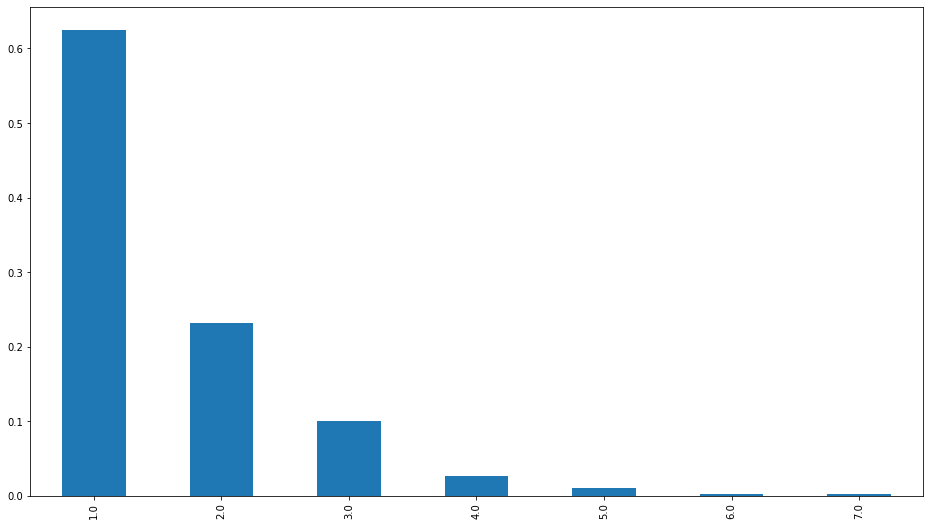

In [195]:





temp_listings=listings_max.merge(listings_bedtails, how='left',left_on='id',right_on='id',suffixes=('', '_drop'))

#Drop the duplicate columns
temp_listings.drop([col for col in temp_listings.columns if 'drop' in col], axis=1, inplace=True)

base_color = sns.color_palette()[0]

temp_listings.beds.value_counts(normalize=True).plot(kind='bar', color=base_color)
# plt.xticks(rotation=45)
# temp_listings

Surprisingly, there are listings with a perfect record. The distribution is rightly skewed, more than 60% of the listings with a perfect record are 1-bedroom and the number decrease as the beds increases

In [172]:
listings_bedtails.sample(10)

,id,property_type,room_type,accommodates,bathrooms,bedrooms,count,occupancy_rate,beds,bed_type,amenities,square_feet
529,368403,House,Entire home/apt,12,3.0,6.0,335,91.780822,6.0,Real Bed,"{""Cable TV"",Internet,""Wireless Internet"",Kitch...",NaN
424,1715582,House,Private room,2,1.5,1.0,94,25.753425,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",NaN
3055,7931111,Apartment,Entire home/apt,2,1.0,1.0,72,19.726027,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN
2052,9863457,Townhouse,Private room,2,1.0,1.0,365,100.000000,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",NaN
703,8742753,Apartment,Private room,2,1.0,1.0,365,100.000000,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
3714,2061463,Apartment,Entire home/apt,2,1.0,0.0,124,33.972603,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
1184,8443952,Townhouse,Private room,2,1.0,1.0,89,24.383562,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",NaN
2429,4869458,House,Shared room,1,1.0,1.0,312,85.479452,1.0,Couch,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3533,5728135,Apartment,Private room,2,1.0,1.0,89,24.383562,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN
2159,8446766,House,Private room,3,1.0,1.0,364,99.726027,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN


In [189]:
listings_bedtails = listings_df[['id', 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms','count',
 'occupancy_rate','beds',
 'bed_type',
 'amenities',
 'square_feet','occupancy_rate']]

listings_bedtails

,id,property_type,room_type,accommodates,bathrooms,bedrooms,count,occupancy_rate,beds,bed_type,amenities,square_feet,occupancy_rate
0,241032,Apartment,Entire home/apt,4,1.0,1.0,346,94.794521,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,94.794521
1,953595,Apartment,Entire home/apt,4,1.0,1.0,291,79.726027,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,79.726027
2,3308979,House,Entire home/apt,11,4.5,5.0,220,60.273973,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,60.273973
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,143,39.178082,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,39.178082
4,278830,House,Entire home/apt,6,2.0,3.0,365,100.000000,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,House,Entire home/apt,6,2.0,3.0,32,8.767123,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,8.767123
3814,8902327,Apartment,Entire home/apt,4,1.0,1.0,273,74.794521,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,74.794521
3815,10267360,House,Entire home/apt,2,1.0,1.0,88,24.109589,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,24.109589
3816,9604740,Condominium,Entire home/apt,2,1.0,0.0,179,49.041096,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,49.041096


listings_bedtails has 8 columns 

In [102]:
listings_hosts = listings_df[['id', 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified']]

listings_hosts.shape

(3818, 19)

listings_hosts has 19 columns

In [190]:
listings_review = listings_df[['id', 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value','occupancy_rate']]


# listings_review
listings_review.shape

(3818, 12)

In [192]:
listings_review.sample(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,occupancy_rate
3218,9975073,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3631,3926008,27,2014-08-29,2015-12-29,92.0,9.0,9.0,10.0,9.0,10.0,9.0,93.972603
3784,692671,50,2012-09-25,2015-10-05,95.0,10.0,10.0,10.0,10.0,9.0,10.0,75.890411
3479,677266,59,2012-09-18,2015-11-25,92.0,9.0,9.0,9.0,9.0,9.0,9.0,99.726027
227,5487522,7,2015-03-23,2015-10-03,89.0,9.0,9.0,9.0,9.0,9.0,9.0,24.383562
2227,1599856,138,2013-10-01,2015-12-30,92.0,9.0,9.0,10.0,10.0,9.0,9.0,95.342466
584,2800448,16,2015-07-16,2015-08-30,94.0,10.0,10.0,10.0,10.0,8.0,9.0,19.452055
2265,7480196,7,2015-08-03,2015-11-09,94.0,9.0,10.0,9.0,9.0,9.0,9.0,30.410959
1049,4084712,45,2014-10-11,2015-12-22,93.0,10.0,9.0,10.0,10.0,9.0,9.0,8.219178
2878,4223597,25,2014-10-28,2016-01-01,95.0,10.0,10.0,10.0,10.0,10.0,9.0,95.342466


listings_review has 11 columns

In [137]:
11+19+8+8+16+23

85

In [138]:
type(list(listings_bedtails.columns))

list

In [130]:

# for x in list2:
#   list1.append(x)



# for x in list2:
#   list1.append(x)

init_listings_col = list(listings_bedtails.columns).extend(listings_hosts.columns.values)
# type(init_listings_col)


# print(init_listings_col)
# for i in :
#     for i in listings_df.columns.to_list:
#     if 

NoneType

In [133]:
listings_others=listings_df[['guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped','requires_license',
 'license',
 'jurisdiction_names',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'reviews_per_month',
 'listing_id',
 'count',
 'occupancy_rate']]

listings_others.shape

(3818, 23)

In [154]:
listings_max = listings_df[listings_df.occupancy_rate==listings_df.occupancy_rate.max()]

In [139]:
listings_location.groupby('city')['']

,id,name,description,neighbourhood,city,state,is_location_exact,count,zipcode,market,smart_location,country_code,country,latitude,longitude,occupancy_rate
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,Queen Anne,Seattle,WA,t,346,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,94.794521
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,Queen Anne,Seattle,WA,t,291,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,79.726027
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,Queen Anne,Seattle,WA,t,220,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,60.273973
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,Queen Anne,Seattle,WA,t,143,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,39.178082
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Queen Anne,Seattle,WA,t,365,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,Fremont,Seattle,WA,t,32,98107,Seattle,"Seattle, WA",US,United States,47.664295,-122.359170,8.767123
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,Portage Bay,Seattle,WA,t,273,98102,Seattle,"Seattle, WA",US,United States,47.649552,-122.318309,74.794521
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,Seattle,WA,f,88,98178,Seattle,"Seattle, WA",US,United States,47.508453,-122.240607,24.109589
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,NaN,Seattle,WA,f,179,98112,Seattle,"Seattle, WA",US,United States,47.632335,-122.275530,49.041096
